## Project Name: Loan Eligibility Prediction Model

OBJECTIVE: Determining if an applicant gets a loan or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C://Users//JAANYA RAHEJA//Downloads//archive (8)//loan-train.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## EDA

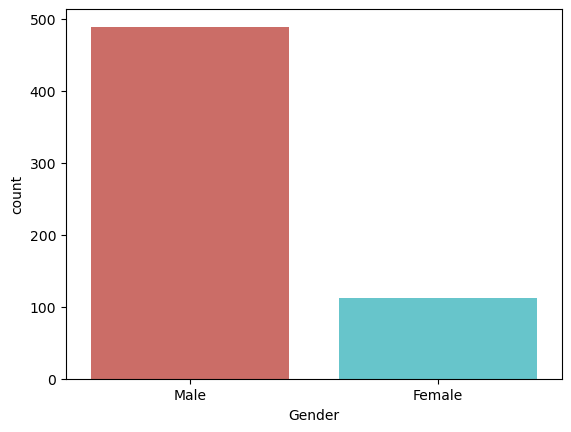

In [6]:
df.Gender.value_counts(dropna=False)
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

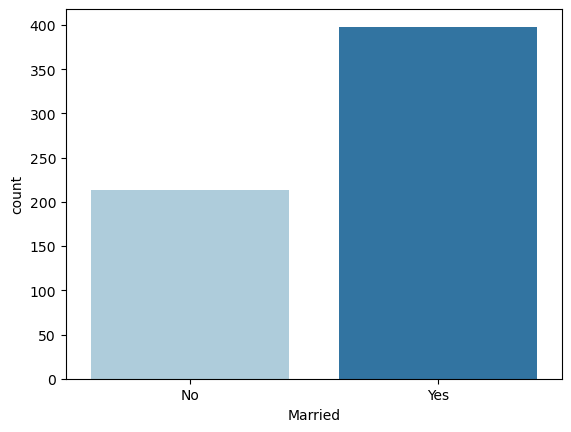

In [7]:
df.Married.value_counts(dropna=False)
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

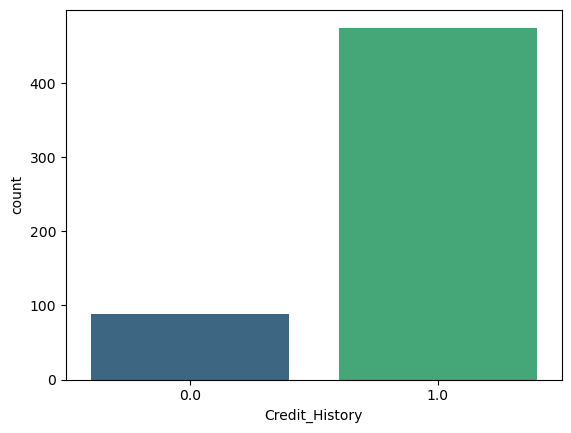

In [8]:
df.Credit_History.value_counts(dropna=False)
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

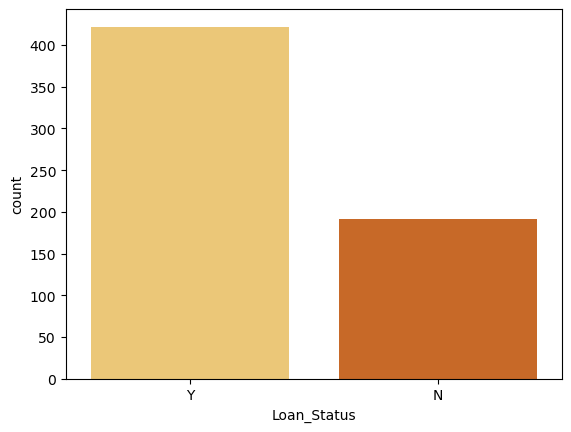

In [9]:
df.Loan_Status.value_counts(dropna=False)
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

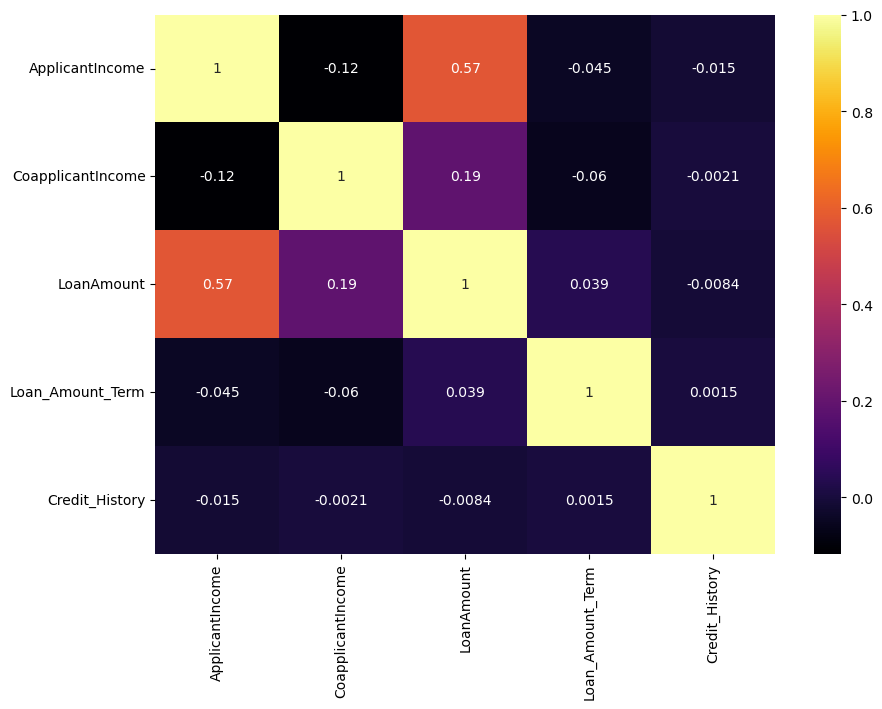

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

## Cleaning

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df = df.drop(['Loan_ID'], axis = 1)

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


## Outliers

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\JAANYA RAHEJA\AppData\Local\Temp\ipykernel_28892\2206497519.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']]))
encoded_cols.columns = encoder.get_feature_names_out(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

# Drop the original categorical columns from df1 and concatenate the encoded columns
df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis=1, inplace=True)
df = pd.concat([df, encoded_cols], axis=1)

# Handling missing values in categorical variables
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Handling missing values in numerical variables
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

Dependents                   0
ApplicantIncome            128
CoapplicantIncome          128
LoanAmount                   0
Loan_Amount_Term             0
Credit_History               0
Loan_Status                128
Gender_Male                128
Married_Yes                128
Education_Not Graduate     128
Self_Employed_Yes          128
Property_Area_Semiurban    128
Property_Area_Urban        128
dtype: int64

In [20]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify the shape of the DataFrame after dropping rows
print("Shape of DataFrame after dropping rows with missing values:", df.shape)

Shape of DataFrame after dropping rows with missing values: (270, 13)


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Dependents" column
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])

# Print the mapping of encoded labels to original categories
print("Encoded values:", label_encoder.classes_)


Encoded values: ['0' '1' '2' '3+']


In [22]:
# Splitting into features (X) and target variable (y)
X_train = df.drop("Loan_Status", axis=1)
y_train = df["Loan_Status"]

# Display the shape of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (270, 12)
Shape of y_train: (270,)


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [24]:
import pandas as pd

test_df = pd.read_csv("C:/Users/JAANYA RAHEJA/Downloads/archive (8)/loan-test.csv")


In [25]:
# Preprocess the test data
# Drop unnecessary columns
test_df.drop(['Loan_ID'], axis=1, inplace=True)

# Handle missing values
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

# Encode categorical variables
encoded_cols_test = pd.DataFrame(encoder.transform(test_df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']]))
encoded_cols_test.columns = encoder.get_feature_names_out(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])
test_df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis=1, inplace=True)
test_df = pd.concat([test_df, encoded_cols_test], axis=1)

# Handle missing values in categorical variables
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)

# Handle missing values in numerical variables
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

# Drop rows with missing values
test_df.dropna(inplace=True)

# Encode the "Dependents" column
test_df['Dependents'] = label_encoder.transform(test_df['Dependents'])

In [27]:
# Splitting into features (X_test)
X_test = test_df.copy()

# Make predictions using the trained classifier
y_pred = clf.predict(X_test)

In [28]:
# Print the predicted values
print("Predicted values:")
print(y_pred)


Predicted values:
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N'
 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 

In [29]:
# Add predicted values to test_df under a new column
test_df['Loan_Status_Predicted'] = y_pred

# Display the updated DataFrame
print(test_df)


     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0             0             5720                  0       110.0   
1             1             3076               1500       126.0   
2             2             5000               1800       208.0   
3             2             2340               2546       100.0   
4             0             3276                  0        78.0   
..          ...              ...                ...         ...   
362           3             4009               1777       113.0   
363           0             4158                709       115.0   
364           0             3250               1993       126.0   
365           0             5000               2393       158.0   
366           0             9200                  0        98.0   

     Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0               360.0             1.0          1.0          1.0   
1               360.0             1.0          1.0          1